In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nengo
import scipy
import pandas as pd
from model_1 import *

palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='whitegrid', font="cmr10", font_scale=1.0)
plt.rcParams['axes.formatter.use_mathtext'] = True

In [5]:
sid = 0
bid = 18
trials = 80
env = Environment(sid=sid)
net = build_network(env)
sim = nengo.Simulator(net, dt=net.env.dt, progress_bar=False)    
with sim:
    sim.run(net.env.t_load)
    for trial in net.env.empirical.query("sid==@sid & bid==@bid")['trial'].unique()[:trials]:
        print(f"running sid {net.env.sid}, block {bid}, trial {trial}")
        net.env.set_cue(bid, trial)
        sim.run(net.env.t_cue)
        env.set_action(sim, net)
        env.set_reward(bid, trial)
        sim.run(net.env.t_reward)

running sid 0, block 18, trial 1
running sid 0, block 18, trial 2
running sid 0, block 18, trial 3
running sid 0, block 18, trial 4
running sid 0, block 18, trial 5
running sid 0, block 18, trial 6
running sid 0, block 18, trial 7
running sid 0, block 18, trial 8
running sid 0, block 18, trial 9
running sid 0, block 18, trial 10
running sid 0, block 18, trial 11
running sid 0, block 18, trial 12
running sid 0, block 18, trial 13
running sid 0, block 18, trial 14
running sid 0, block 18, trial 15
running sid 0, block 18, trial 16
running sid 0, block 18, trial 17
running sid 0, block 18, trial 18
running sid 0, block 18, trial 19
running sid 0, block 18, trial 20
running sid 0, block 18, trial 21
running sid 0, block 18, trial 22
running sid 0, block 18, trial 23
running sid 0, block 18, trial 24
running sid 0, block 18, trial 25
running sid 0, block 18, trial 26
running sid 0, block 18, trial 27
running sid 0, block 18, trial 28
running sid 0, block 18, trial 29
running sid 0, block 18

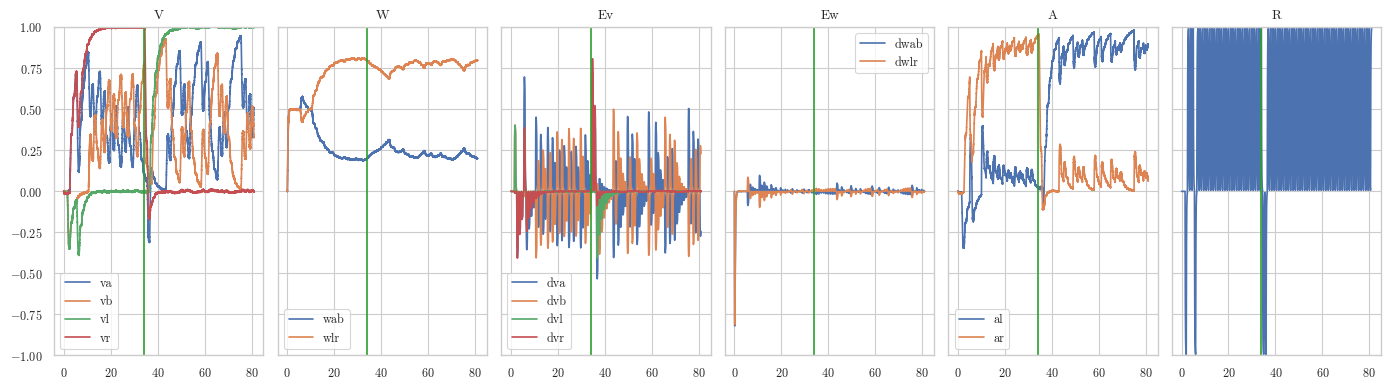

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=6, sharey=True, sharex=True, figsize=(14, 4))
axes[0].plot(sim.trange(), sim.data[net.p_v][:,0], label='va')
axes[0].plot(sim.trange(), sim.data[net.p_v][:,1], label='vb')
axes[0].plot(sim.trange(), sim.data[net.p_v][:,2], label='vl')
axes[0].plot(sim.trange(), sim.data[net.p_v][:,3], label='vr')
axes[1].plot(sim.trange(), sim.data[net.p_w][:,0], label='wab')
axes[1].plot(sim.trange(), sim.data[net.p_w][:,1], label='wlr')
axes[2].plot(sim.trange(), sim.data[net.p_ev][:,0], label='dva')
axes[2].plot(sim.trange(), sim.data[net.p_ev][:,1], label='dvb')
axes[2].plot(sim.trange(), sim.data[net.p_ev][:,2], label='dvl')
axes[2].plot(sim.trange(), sim.data[net.p_ev][:,3], label='dvr')
axes[3].plot(sim.trange(), sim.data[net.p_ew][:,0], label='dwab')
axes[3].plot(sim.trange(), sim.data[net.p_ew][:,1], label='dwlr')
axes[4].plot(sim.trange(), sim.data[net.p_a][:,0], label='al')
axes[4].plot(sim.trange(), sim.data[net.p_a][:,1], label='ar')
axes[5].plot(sim.trange(), sim.data[net.p_reward][:,0])
axes[0].set(title='V', ylim=(-1,1))
axes[1].set(title='W')
axes[2].set(title='Ev')
axes[3].set(title='Ew')
axes[4].set(title='A')
axes[5].set(title='R')
axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[3].legend()
axes[4].legend()
if trials>40:
    reversal_at_trial = env.empirical.query("sid==@sid & bid==@bid")['reversal_at_trial'].unique()[0]
    axes[0].axvline(reversal_at_trial, color=palette[2])
    axes[1].axvline(reversal_at_trial, color=palette[2])
    axes[2].axvline(reversal_at_trial, color=palette[2])
    axes[3].axvline(reversal_at_trial, color=palette[2])
    axes[4].axvline(reversal_at_trial, color=palette[2])
    axes[5].axvline(reversal_at_trial, color=palette[2])
plt.tight_layout()